<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Откроем-и-изучим-файл" data-toc-modified-id="Откроем-и-изучим-файл-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Откроем и изучим файл</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов из банка

В нашем распоряжении исторические данные банка "Бета-Банк" о поведении клиентов и расторжении договоров с банком. Из него стали уходить клиенты. Каждый месяц. 

Данные включают в себя уникальную информацию про каждого клиента, а именно:
* уникальный идентификатор
* фамилия
* кредитный рейтинг
* страна проживания
* пол
* возраст
* сколько лет человек является клиентом банка
* баланс на счёте
* кол-во продуктов банка, которые используются клиентом
* наличие кредитной карты
* активность клиента
* предполагаемая зарплата  

Банковские маркетологи посчитали, что сохранять текущих клиентов дешевле, чем привлекать новых.

Нам нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. 

<h1>План работы<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a>

## Подготовка данных

## Откроем и изучим файл

Для начала импортируем всё необходимое для выполнения проекта

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, precision_recall_curve, roc_auc_score, roc_curve
from sklearn.utils import shuffle

In [2]:
try:
    forsen = pd.read_csv('C:/Users/Games/Downloads/Churn.csv')
except:
    forsen = pd.read_csv('/datasets/Churn.csv')
    
display(forsen.head())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [3]:
forsen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


В датасете 10 тыс. строк, 14 столбцов. Пропуски только в одном из них - в кол-ве лет, которые человек является клиентом банка (909 шт.). Их мы позже заполним медианным значением.  
С типами данных каждого столбца всё в порядке, кроме столбца с данными о кол-ве лет, которые каждый клиент провёл взаимодействуя с банком. Сделаем их целыми числами. Остальное преобразовывать не нужно.  
Для нашего удобства, однако, необходимо привести названия столбцов к нижнему регистру.

In [4]:
forsen.columns = forsen.columns.str.lower()
forsen.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

Теперь преобразуем их ещё в более подобающий вид, разделив слова нижними подчёркиваниями.

In [5]:
forsen.columns = ('row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited')
forsen.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

Теперь заполним пропуски в вышеупомянутом столбце а также преобразуем тип данных в столбце 'tenure' в целые числа.

In [6]:
forsen['tenure'] = forsen['tenure'].fillna(forsen['tenure'].median())
forsen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  int64  
 1   customer_id       10000 non-null  int64  
 2   surname           10000 non-null  object 
 3   credit_score      10000 non-null  int64  
 4   geography         10000 non-null  object 
 5   gender            10000 non-null  object 
 6   age               10000 non-null  int64  
 7   tenure            10000 non-null  float64
 8   balance           10000 non-null  float64
 9   num_of_products   10000 non-null  int64  
 10  has_cr_card       10000 non-null  int64  
 11  is_active_member  10000 non-null  int64  
 12  estimated_salary  10000 non-null  float64
 13  exited            10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [7]:
forsen['tenure'] = forsen['tenure'].astype('int64')
forsen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  int64  
 1   customer_id       10000 non-null  int64  
 2   surname           10000 non-null  object 
 3   credit_score      10000 non-null  int64  
 4   geography         10000 non-null  object 
 5   gender            10000 non-null  object 
 6   age               10000 non-null  int64  
 7   tenure            10000 non-null  int64  
 8   balance           10000 non-null  float64
 9   num_of_products   10000 non-null  int64  
 10  has_cr_card       10000 non-null  int64  
 11  is_active_member  10000 non-null  int64  
 12  estimated_salary  10000 non-null  float64
 13  exited            10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Пропуски отсутствуют, все данные в нужном формате. 

Проверим наличие дубликатов в датасете.

In [8]:
forsen.duplicated().sum()

0

Дублирующиеся строки отсутствуют.

Теперь удалим ненужные столбцы из датасета, т.е. те столбцы, данные в которых не помогут в обучении модели. А именно:  
* фамилия
* индекс строки в данных
* уникальный идентификатор клиента

In [9]:
forsen = forsen.drop(['surname', 'row_number', 'customer_id'], axis=1).copy()
forsen.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Применим прямое кодирование для преобразования категориальных признаков в численные. У нас таких два - 'geography' и 'gender'.

In [10]:
forsen['geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: geography, dtype: int64

In [11]:
forsen['gender'].value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

Целевым признаком является столбец 'exited' с данными о том, ушёл клиент или нет.  

Теперь обозначим целевой признак и разделим исходный датасет на три выборки: 
* тренировочную
* валидационную 
* тестовую

In [13]:
RANDOM_STATE = 12345

In [14]:
features = forsen.drop(['exited'], axis=1)
target = forsen['exited']

features_train, features_other, target_train, target_other = train_test_split(features, target,
                                                                              test_size=0.4, random_state=RANDOM_STATE)
features_valid, features_test, target_valid, target_test = train_test_split(features_other, target_other,
                                                                             test_size=0.5, random_state=RANDOM_STATE)


In [15]:
print('Objects of train:', len(features_train))
print('Objects of valid:', len(features_valid))
print('Objects of test:', len(features_test))
print('Sum of objects:', len(features_train) + len(features_test) + len(features_test))
print()
print('Objects of original set (check sum):', len(forsen))

Objects of train: 6000
Objects of valid: 2000
Objects of test: 2000
Sum of objects: 10000

Objects of original set (check sum): 10000


Задействуем прямое кодирование.

In [16]:
cat_features = ['geography', 'gender']

ohe_encoder = OneHotEncoder(sparse=False, drop='first')

features_train_ohe = ohe_encoder.fit_transform(features_train[cat_features])
features_train[ohe_encoder.get_feature_names()] = features_train_ohe
features_train.drop(cat_features, axis=1, inplace=True)

features_valid_ohe = ohe_encoder.transform(features_valid[cat_features])
features_valid[ohe_encoder.get_feature_names()] = features_valid_ohe
features_valid.drop(cat_features, axis=1, inplace=True)

features_test_ohe = ohe_encoder.transform(features_test[cat_features])
features_test[ohe_encoder.get_feature_names()] = features_test_ohe
features_test.drop(cat_features, axis=1, inplace=True)

display(features_train.head())
print()
print()
display(features_valid.head())
print()
print()
display(features_test.head())

C:\Users\Games\AppData\Local\Temp\ipykernel_18744\1998967785.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[ohe_encoder.get_feature_names()] = features_train_ohe
C:\Users\Games\anaconda3\envs\ds_practicum_env\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\Games\anaconda3\envs\ds_practicum_env\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is tr

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,x0_Germany,x0_Spain,x1_Male
7479,567,35,8,153137.74,1,1,0,88659.07,0.0,1.0,1.0
3411,711,37,8,113899.92,1,0,0,80215.20,0.0,0.0,0.0
6027,850,44,3,140393.65,2,0,1,186285.52,1.0,0.0,1.0
1247,512,24,6,0.00,2,1,0,37654.31,0.0,0.0,1.0
3716,665,27,2,147435.96,1,0,0,187508.06,1.0,0.0,0.0


,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,x0_Germany,x0_Spain,x1_Male
8532,585,35,2,0.00,2,1,0,98621.04,0.0,0.0,0.0
5799,625,45,3,0.00,1,1,1,184474.15,0.0,0.0,0.0
5511,667,32,0,103846.65,1,1,0,20560.69,1.0,0.0,1.0
7365,568,36,10,153610.61,1,1,1,54083.80,0.0,1.0,0.0
7367,606,42,10,0.00,2,1,0,177938.52,0.0,1.0,1.0


,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,x0_Germany,x0_Spain,x1_Male
7041,438,38,2,0.00,2,1,0,136859.55,0.0,0.0,1.0
5709,644,39,9,0.00,1,1,0,3740.93,0.0,0.0,0.0
7117,564,31,5,121461.87,1,1,1,20432.09,0.0,1.0,1.0
7775,628,40,10,0.00,2,1,0,103832.58,0.0,1.0,1.0
8735,728,30,10,114835.43,1,0,1,37662.49,0.0,0.0,1.0


Масштабируем признаки.

In [17]:
numeric = ['credit_score', 'age', 'balance', 'estimated_salary']
scaler = StandardScaler()
features_train[numeric] = scaler.fit_transform(features_train[numeric])
pd.options.mode.chained_assignment = None

C:\Users\Games\AppData\Local\Temp\ipykernel_18744\3380027884.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.fit_transform(features_train[numeric])
C:\Users\Games\anaconda3\envs\ds_practicum_env\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [18]:
display(features_train.head())

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,x0_Germany,x0_Spain,x1_Male
7479,-0.886751,-0.373192,8,1.232271,1,1,0,-0.187705,0.0,1.0,1.0
3411,0.608663,-0.183385,8,0.600563,1,0,0,-0.333945,0.0,0.0,0.0
6027,2.052152,0.480939,3,1.027098,2,0,1,1.503095,1.0,0.0,1.0
1247,-1.457915,-1.417129,6,-1.233163,2,1,0,-1.071061,0.0,0.0,1.0
3716,0.130961,-1.132419,2,1.140475,1,0,0,1.524268,1.0,0.0,0.0


In [19]:
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_valid.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,x0_Germany,x0_Spain,x1_Male
8532,-0.699824,-0.373192,2,-1.233163,2,1,0,-0.015173,0.0,0.0,0.0
5799,-0.284431,0.575842,3,-1.233163,1,1,1,1.471724,0.0,0.0,0.0
5511,0.151731,-0.657902,0,0.438711,1,1,0,-1.367107,1.0,0.0,1.0
7365,-0.876366,-0.278288,10,1.239884,1,1,1,-0.786517,0.0,1.0,0.0
7367,-0.481743,0.291132,10,-1.233163,2,1,0,1.358533,0.0,1.0,1.0


In [20]:
features_test[numeric] = scaler.transform(features_test[numeric])
features_test.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,x0_Germany,x0_Spain,x1_Male
7041,-2.226392,-0.088482,2,-1.233163,2,1,0,0.647083,0.0,0.0,1.0
5709,-0.087120,0.006422,9,-1.233163,1,1,0,-1.658410,0.0,0.0,0.0
7117,-0.917905,-0.752805,5,0.722307,1,1,1,-1.369334,0.0,1.0,1.0
7775,-0.253277,0.101325,10,-1.233163,2,1,0,0.075086,0.0,1.0,1.0
8735,0.785204,-0.847708,10,0.615625,1,0,1,-1.070919,0.0,0.0,1.0


## Исследование задачи

Посмотрим на дизбаланс классов. Изучим количество 0 и 1 в целевом признаке. 

In [21]:
forsen['exited'].value_counts().to_frame()

,exited
0,7963
1,2037


Соотношение неравное, сильный дизбаланс классов. 20,4% положительных и 79,6% отрицательных.

Обучим различные модели с разными гиперпараметрами, игнорируя дизбаланс классов.  
Это задача классификации, поэтому будем использовать следующие модели:
* случайный лес
* решающее дерево
* логистическая регрессия

**случайный лес**

In [22]:
best_model = None
best_result = 0
best_est = 0
for est in range(1, 11, 1):
    model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=est) 
    model.fit(features_train, target_train) 
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid) 
    if result > best_result:
        best_model = model
        best_result = result
        best_est = est

print("F1_score наилучшей модели на валидационной выборке:", best_result, "наилучшее кол-во деревьев:", best_est)

F1_score наилучшей модели на валидационной выборке: 0.5816186556927296 наилучшее кол-во деревьев: 7


In [23]:
best_model = None
best_result = 0
best_est = 0
for est in range(100, 201, 5):
    model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=est) 
    model.fit(features_train, target_train) 
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid) 
    if result > best_result:
        best_model = model
        best_result = result
        best_est = est

print("F1_score наилучшей модели на валидационной выборке:", best_result, "наилучшее кол-во деревьев:", best_est)

F1_score наилучшей модели на валидационной выборке: 0.592814371257485 наилучшее кол-во деревьев: 180


In [24]:
best_model = None
best_result = 0
best_est = 0
for est in range(50, 101, 5):
    model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=est) 
    model.fit(features_train, target_train) 
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid) 
    if result > best_result:
        best_model = model
        best_result = result
        best_est = est

print("F1_score наилучшей модели на валидационной выборке:", best_result, "наилучшее кол-во деревьев:", best_est)

F1_score наилучшей модели на валидационной выборке: 0.5863095238095238 наилучшее кол-во деревьев: 75


**В модели случайного леса наилучшее значение метрики Ф1 (0.5928) достигается при кол-ве деревьев равному 180.**

**решающее дерево**

In [25]:
best_model = None
best_depth = 0
best_result = 0
for depth in range(1,6):
    model= DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=depth)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:
        best_model = model
        best_result = result
        best_depth = depth
        
print('Наиболее подходящая глубина дерева =', best_depth, ', F1 score модели:', best_result)

Наиболее подходящая глубина дерева = 4 , F1 score модели: 0.5528700906344411


**В модели решающего дерева наилучшее значение метрики Ф1 (0.5529) достигается при максимальной глубине в 4.**

**логистическая регрессия**

In [26]:
best_model = None
best_max_iter = 0
best_result = 0
for iter in [100, 250, 500, 750, 1000]:
    model = LogisticRegression(random_state=RANDOM_STATE, solver='lbfgs', max_iter=iter)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:
        best_model = model
        best_result = result
        best_max_iter = iter

print('Наиболее подходящее кол-во итераций:', best_max_iter, ', F1 score модели:', best_result)

Наиболее подходящее кол-во итераций: 100 , F1 score модели: 0.33108108108108103


**В модели логистической регрессии наилучшее значение метрики Ф1 (0.3311) достигается при кол-ве итераций равному 100.**  
Наихудшее значение метрики Ф1 из трёх моделей.

## Борьба с дисбалансом

Проведём обучение моделей в цикле для выявленния наилучших значений гиперпараметров на новых выборках, предназначенных для борьбы с дизбалансом классов.

**увеличение выборки**

Преобразование проходит в несколько этапов:
* Разделить обучающую выборку на отрицательные и положительные объекты;
* Скопировать несколько раз положительные объекты;
* С учётом полученных данных создать новую обучающую выборку;
* Перемешать данные: идущие друг за другом одинаковые вопросы не помогут обучению.

In [27]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=RANDOM_STATE)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

print(features_upsampled.shape)
print(target_upsampled.shape)

(9588, 11)
(9588,)


In [28]:
target_upsampled.value_counts().to_frame()

,exited
0,4804
1,4784


**логистическая регрессия**

In [29]:
best_model = None
best_max_iter = 0
best_result = 0
for iter in [100, 250, 500, 750, 1000]:
    model = LogisticRegression(random_state=RANDOM_STATE, solver='lbfgs', max_iter=iter)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:
        best_model = model
        best_result = result
        best_max_iter = iter

print('Наиболее подходящее кол-во итераций:', best_max_iter, ', F1 score модели:', best_result)

Наиболее подходящее кол-во итераций: 100 , F1 score модели: 0.4888507718696398


Значение метрики Ф1 на новой upsampled выборке не изменилось **(0.4889)**.

**случайный лес**

In [30]:
best_model = None
best_result = 0
best_est = 0
for est in range(100, 201, 5):
    model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=est) 
    model.fit(features_upsampled, target_upsampled) 
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid) 
    if result > best_result:
        best_model = model
        best_result = result
        best_est = est

print("F1_score наилучшей модели на валидационной выборке:", best_result, "наилучшее кол-во деревьев:", best_est)

F1_score наилучшей модели на валидационной выборке: 0.6089238845144357 наилучшее кол-во деревьев: 105


In [31]:
best_model = None
best_result = 0
best_est = 0
for est in range(50, 101, 5):
    model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=est) 
    model.fit(features_upsampled, target_upsampled) 
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid) 
    if result > best_result:
        best_model = model
        best_result = result
        best_est = est

print("F1_score наилучшей модели на валидационной выборке:", best_result, "наилучшее кол-во деревьев:", best_est)

F1_score наилучшей модели на валидационной выборке: 0.611764705882353 наилучшее кол-во деревьев: 90


In [32]:
best_model = None
best_result = 0
best_est = 0
for est in range(1, 11, 1):
    model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=est) 
    model.fit(features_upsampled, target_upsampled) 
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid) 
    if result > best_result:
        best_model = model
        best_result = result
        best_est = est

print("F1_score наилучшей модели на валидационной выборке:", best_result, "наилучшее кол-во деревьев:", best_est)

F1_score наилучшей модели на валидационной выборке: 0.5849056603773585 наилучшее кол-во деревьев: 10


Наилучшее значение метрики Ф1 на новой выборке, призванной бороться с дизбалансом, достигается при значении деревьев 90 - **(0.6118)**.

**решающее дерево**

In [33]:
best_model = None
best_depth = 0
best_result = 0
for depth in range(1,6):
    model= DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=depth)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:
        best_model = model
        best_result = result
        best_depth = depth
        
print('Наиболее подходящая глубина дерева =', best_depth, ', F1 score модели:', best_result)

Наиболее подходящая глубина дерева = 5 , F1 score модели: 0.5963791267305644


Наилучшее значение метрики Ф1 на новой выборке upsampled достигается при макс. глубине в 5 - **(0.5964)**.

Хуже всего себя показала модель логистической регрессии. Лучше всего случайный лес - **0.6118**.

**уменьшение выборки**

Преобразование проходит в несколько этапов:
* Разделить обучающую выборку на отрицательные и положительные объекты;
* Случайным образом отбросить часть из отрицательных объектов;
* С учётом полученных данных создать новую обучающую выборку;
* Перемешать данные. Положительные не должны идти следом за отрицательными: алгоритмам будет сложнее обучаться.

In [34]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=RANDOM_STATE)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=RANDOM_STATE)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=RANDOM_STATE)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

print(features_downsampled.shape)
print(target_downsampled.shape)

(2397, 11)
(2397,)


In [35]:
target_downsampled.value_counts().to_frame()

,exited
0,1201
1,1196


**логистическая регрессия**

In [36]:
best_model = None
best_max_iter = 0
best_result = 0
for iter in [100, 250, 500, 750, 1000]:
    model = LogisticRegression(random_state=RANDOM_STATE, solver='lbfgs', max_iter=iter)
    model.fit(features_downsampled, target_downsampled)
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:
        best_model = model
        best_result = result
        best_max_iter = iter

print('Наиболее подходящее кол-во итераций:', best_max_iter, ', F1 score модели:', best_result)

Наиболее подходящее кол-во итераций: 100 , F1 score модели: 0.48406546080964685


Наилучшее значение метрики Ф1 на downsampled выборке достигается при кол-ве итераций в 100, но оно оказалось меньше, чем при увеличении выборки - **0.4841 против 0.4889**.

**случайный лес**

In [37]:
best_model = None
best_result = 0
best_est = 0
for est in range(100, 201, 5):
    model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=est) 
    model.fit(features_downsampled, target_downsampled) 
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid) 
    if result > best_result:
        best_model = model
        best_result = result
        best_est = est

print("F1_score наилучшей модели на валидационной выборке:", best_result, "наилучшее кол-во деревьев:", best_est)

F1_score наилучшей модели на валидационной выборке: 0.5886722376973075 наилучшее кол-во деревьев: 155


In [38]:
best_model = None
best_result = 0
best_est = 0
for est in range(50, 101, 5):
    model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=est) 
    model.fit(features_downsampled, target_downsampled) 
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid) 
    if result > best_result:
        best_model = model
        best_result = result
        best_est = est

print("F1_score наилучшей модели на валидационной выборке:", best_result, "наилучшее кол-во деревьев:", best_est)

F1_score наилучшей модели на валидационной выборке: 0.5832549388523048 наилучшее кол-во деревьев: 60


In [39]:
best_model = None
best_result = 0
best_est = 0
for est in range(1, 11, 1):
    model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=est) 
    model.fit(features_downsampled, target_downsampled) 
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid) 
    if result > best_result:
        best_model = model
        best_result = result
        best_est = est

print("F1_score наилучшей модели на валидационной выборке:", best_result, "наилучшее кол-во деревьев:", best_est)

F1_score наилучшей модели на валидационной выборке: 0.5778648383937316 наилучшее кол-во деревьев: 8


Наилучшее значение метрики Ф1 на downsampled выборке модели случайного леса при кол-ве деревьев 155 оказалось ниже, чем при upsampled выборке **(0.5887 против 0.6118)**.

**решающее дерево**

In [40]:
best_model = None
best_depth = 0
best_result = 0
for depth in range(1,6):
    model= DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=depth)
    model.fit(features_downsampled, target_downsampled)
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:
        best_model = model
        best_result = result
        best_depth = depth
        
print('Наиболее подходящая глубина дерева =', best_depth, ', F1 score модели:', best_result)

Наиболее подходящая глубина дерева = 5 , F1 score модели: 0.5928934010152282


Наилучшее значение метрики Ф1 на downsampled выборке модели решающего дерева при кол-ве деревьев - 5, оказалось чуть ниже, чем при upsampled выборке **(0.5929 против 0.5964)**.

Значения метрики Ф1 всех моделей при уменьшении выборки показали себя хуже, чем при её увеличении.

**изменение порога**

**логистическая регрессия**

Порог = 0.00 | Точность = 0.209, Полнота = 1.000, F1 = 0.346
Порог = 0.05 | Точность = 0.235, Полнота = 0.981, F1 = 0.379
Порог = 0.10 | Точность = 0.276, Полнота = 0.897, F1 = 0.423
Порог = 0.15 | Точность = 0.327, Полнота = 0.792, F1 = 0.463
Порог = 0.20 | Точность = 0.369, Полнота = 0.672, F1 = 0.477
Порог = 0.25 | Точность = 0.426, Полнота = 0.603, F1 = 0.499
Порог = 0.30 | Точность = 0.455, Полнота = 0.517, F1 = 0.484
Порог = 0.35 | Точность = 0.488, Полнота = 0.426, F1 = 0.455
Порог = 0.40 | Точность = 0.502, Полнота = 0.330, F1 = 0.398
Порог = 0.45 | Точность = 0.524, Полнота = 0.282, F1 = 0.367
Порог = 0.50 | Точность = 0.563, Полнота = 0.234, F1 = 0.331
Порог = 0.55 | Точность = 0.621, Полнота = 0.172, F1 = 0.270
Порог = 0.60 | Точность = 0.654, Полнота = 0.122, F1 = 0.206
Порог = 0.65 | Точность = 0.647, Полнота = 0.079, F1 = 0.141
Порог = 0.70 | Точность = 0.633, Полнота = 0.045, F1 = 0.085
Порог = 0.75 | Точность = 0.650, Полнота = 0.031, F1 = 0.059
Порог = 0.80 | Точность 

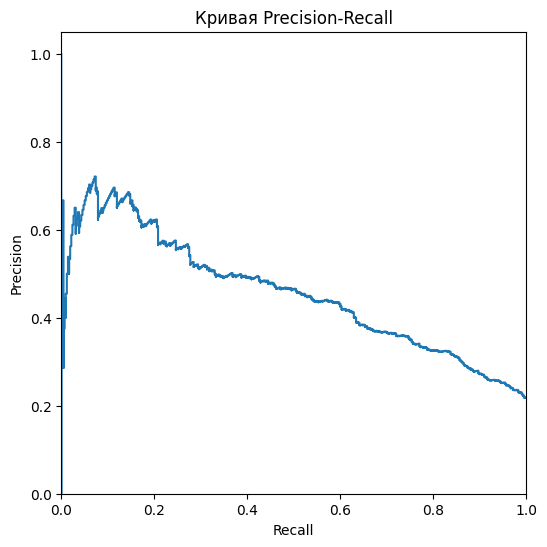

In [41]:
model = LogisticRegression(random_state=RANDOM_STATE, solver='lbfgs')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.95, 0.05):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)

    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1 = {:.3f}".format(
        threshold, precision, recall, f1))
    
precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show() 

Порог = 0.00 | Точность = 0.209, Полнота = 1.000, F1 = 0.346
Порог = 0.05 | Точность = 0.209, Полнота = 1.000, F1 = 0.346
Порог = 0.10 | Точность = 0.215, Полнота = 1.000, F1 = 0.354
Порог = 0.15 | Точность = 0.228, Полнота = 0.990, F1 = 0.371
Порог = 0.20 | Точность = 0.242, Полнота = 0.969, F1 = 0.387
Порог = 0.25 | Точность = 0.258, Полнота = 0.938, F1 = 0.404
Порог = 0.30 | Точность = 0.276, Полнота = 0.904, F1 = 0.423
Порог = 0.35 | Точность = 0.300, Полнота = 0.871, F1 = 0.447
Порог = 0.40 | Точность = 0.330, Полнота = 0.823, F1 = 0.472
Порог = 0.45 | Точность = 0.358, Полнота = 0.754, F1 = 0.485
Порог = 0.50 | Точность = 0.381, Полнота = 0.682, F1 = 0.489
Порог = 0.55 | Точность = 0.417, Полнота = 0.627, F1 = 0.500
Порог = 0.60 | Точность = 0.435, Полнота = 0.562, F1 = 0.491
Порог = 0.65 | Точность = 0.471, Полнота = 0.488, F1 = 0.479
Порог = 0.70 | Точность = 0.488, Полнота = 0.385, F1 = 0.430
Порог = 0.75 | Точность = 0.500, Полнота = 0.297, F1 = 0.372
Порог = 0.80 | Точность 

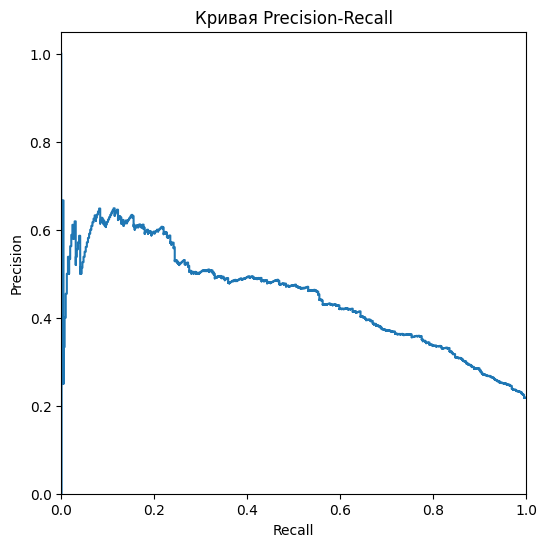

In [42]:
model = LogisticRegression(random_state=RANDOM_STATE, solver='lbfgs', class_weight='balanced')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.95, 0.05):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)

    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1 = {:.3f}".format(
        threshold, precision, recall, f1))
    
precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show() 

Метрика Ф1 при пороге в 0.55 и class_weight='balanced' = 0.5

**случайный лес**

Порог = 0.00 | Точность = 0.217, Полнота = 0.995, F1 = 0.357
Порог = 0.05 | Точность = 0.281, Полнота = 0.940, F1 = 0.432
Порог = 0.10 | Точность = 0.339, Полнота = 0.878, F1 = 0.489
Порог = 0.15 | Точность = 0.398, Полнота = 0.821, F1 = 0.536
Порог = 0.20 | Точность = 0.457, Полнота = 0.758, F1 = 0.570
Порог = 0.25 | Точность = 0.521, Полнота = 0.718, F1 = 0.604
Порог = 0.30 | Точность = 0.574, Полнота = 0.653, F1 = 0.611
Порог = 0.35 | Точность = 0.640, Полнота = 0.612, F1 = 0.626
Порог = 0.40 | Точность = 0.682, Полнота = 0.565, F1 = 0.618
Порог = 0.45 | Точность = 0.714, Полнота = 0.502, F1 = 0.590
Порог = 0.50 | Точность = 0.776, Полнота = 0.455, F1 = 0.573
Порог = 0.55 | Точность = 0.811, Полнота = 0.421, F1 = 0.554
Порог = 0.60 | Точность = 0.852, Полнота = 0.400, F1 = 0.544
Порог = 0.65 | Точность = 0.867, Полнота = 0.344, F1 = 0.493
Порог = 0.70 | Точность = 0.890, Полнота = 0.311, F1 = 0.461
Порог = 0.75 | Точность = 0.897, Полнота = 0.249, F1 = 0.390
Порог = 0.80 | Точность 

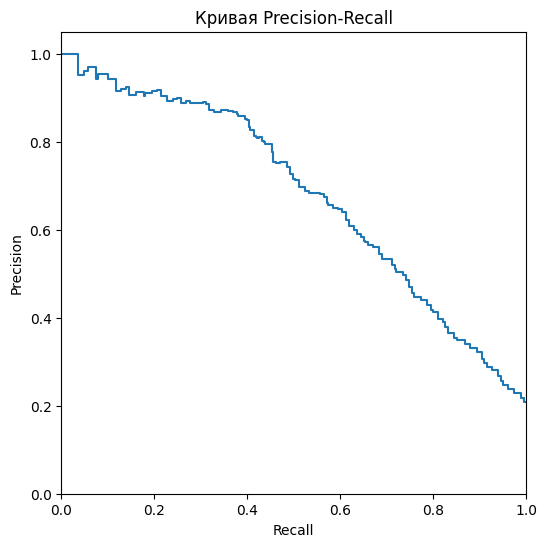

In [43]:
model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=120)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.95, 0.05):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)

    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1 = {:.3f}".format(
        threshold, precision, recall, f1))
    
precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show() 

Порог = 0.00 | Точность = 0.220, Полнота = 0.998, F1 = 0.361
Порог = 0.05 | Точность = 0.280, Полнота = 0.926, F1 = 0.430
Порог = 0.10 | Точность = 0.343, Полнота = 0.864, F1 = 0.491
Порог = 0.15 | Точность = 0.407, Полнота = 0.799, F1 = 0.539
Порог = 0.20 | Точность = 0.476, Полнота = 0.746, F1 = 0.581
Порог = 0.25 | Точность = 0.540, Полнота = 0.675, F1 = 0.600
Порог = 0.30 | Точность = 0.594, Полнота = 0.629, F1 = 0.611
Порог = 0.35 | Точность = 0.645, Полнота = 0.586, F1 = 0.614
Порог = 0.40 | Точность = 0.683, Полнота = 0.531, F1 = 0.598
Порог = 0.45 | Точность = 0.744, Полнота = 0.493, F1 = 0.593
Порог = 0.50 | Точность = 0.803, Полнота = 0.447, F1 = 0.575
Порог = 0.55 | Точность = 0.836, Полнота = 0.390, F1 = 0.532
Порог = 0.60 | Точность = 0.867, Полнота = 0.359, F1 = 0.508
Порог = 0.65 | Точность = 0.886, Полнота = 0.316, F1 = 0.466
Порог = 0.70 | Точность = 0.910, Полнота = 0.266, F1 = 0.411
Порог = 0.75 | Точность = 0.896, Полнота = 0.206, F1 = 0.335
Порог = 0.80 | Точность 

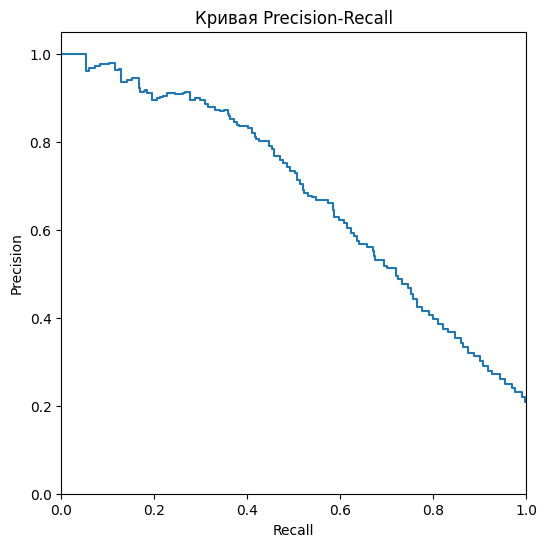

In [44]:
model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=120, class_weight='balanced')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.95, 0.05):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)

    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1 = {:.3f}".format(
        threshold, precision, recall, f1))
    
precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show() 

Порог = 0.00 | Точность = 0.214, Полнота = 0.998, F1 = 0.352
Порог = 0.05 | Точность = 0.274, Полнота = 0.938, F1 = 0.424
Порог = 0.10 | Точность = 0.334, Полнота = 0.883, F1 = 0.485
Порог = 0.15 | Точность = 0.395, Полнота = 0.828, F1 = 0.535
Порог = 0.20 | Точность = 0.454, Полнота = 0.758, F1 = 0.568
Порог = 0.25 | Точность = 0.517, Полнота = 0.711, F1 = 0.598
Порог = 0.30 | Точность = 0.580, Полнота = 0.660, F1 = 0.617
Порог = 0.35 | Точность = 0.628, Полнота = 0.622, F1 = 0.625
Порог = 0.40 | Точность = 0.675, Полнота = 0.557, F1 = 0.611
Порог = 0.45 | Точность = 0.705, Полнота = 0.502, F1 = 0.587
Порог = 0.50 | Точность = 0.794, Полнота = 0.469, F1 = 0.589
Порог = 0.55 | Точность = 0.813, Полнота = 0.426, F1 = 0.559
Порог = 0.60 | Точность = 0.862, Полнота = 0.390, F1 = 0.537
Порог = 0.65 | Точность = 0.869, Полнота = 0.349, F1 = 0.498
Порог = 0.70 | Точность = 0.886, Полнота = 0.316, F1 = 0.466
Порог = 0.75 | Точность = 0.899, Полнота = 0.256, F1 = 0.399
Порог = 0.80 | Точность 

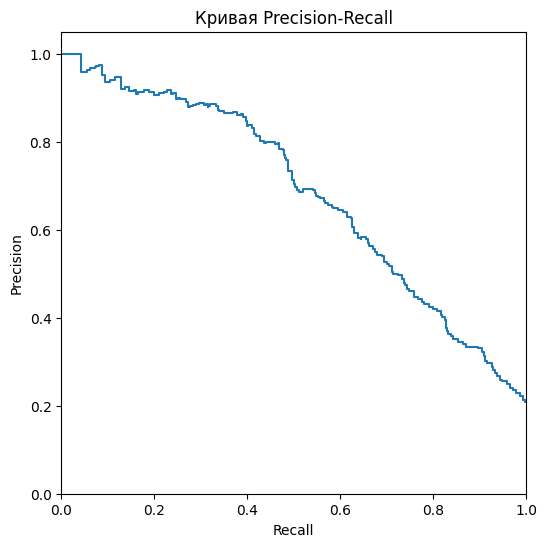

In [45]:
model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=185)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.95, 0.05):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)

    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1 = {:.3f}".format(
        threshold, precision, recall, f1))
    
precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show() 

Порог = 0.00 | Точность = 0.214, Полнота = 0.998, F1 = 0.352
Порог = 0.05 | Точность = 0.275, Полнота = 0.938, F1 = 0.425
Порог = 0.10 | Точность = 0.337, Полнота = 0.876, F1 = 0.487
Порог = 0.15 | Точность = 0.401, Полнота = 0.825, F1 = 0.540
Порог = 0.20 | Точность = 0.454, Полнота = 0.761, F1 = 0.568
Порог = 0.25 | Точность = 0.517, Полнота = 0.711, F1 = 0.598
Порог = 0.30 | Точность = 0.584, Полнота = 0.660, F1 = 0.620
Порог = 0.35 | Точность = 0.635, Полнота = 0.620, F1 = 0.627
Порог = 0.40 | Точность = 0.669, Полнота = 0.555, F1 = 0.607
Порог = 0.45 | Точность = 0.705, Полнота = 0.502, F1 = 0.587
Порог = 0.50 | Точность = 0.792, Полнота = 0.474, F1 = 0.593
Порог = 0.55 | Точность = 0.825, Полнота = 0.419, F1 = 0.556
Порог = 0.60 | Точность = 0.858, Полнота = 0.390, F1 = 0.536
Порог = 0.65 | Точность = 0.868, Полнота = 0.347, F1 = 0.496
Порог = 0.70 | Точность = 0.884, Полнота = 0.311, F1 = 0.460
Порог = 0.75 | Точность = 0.898, Полнота = 0.254, F1 = 0.396
Порог = 0.80 | Точность 

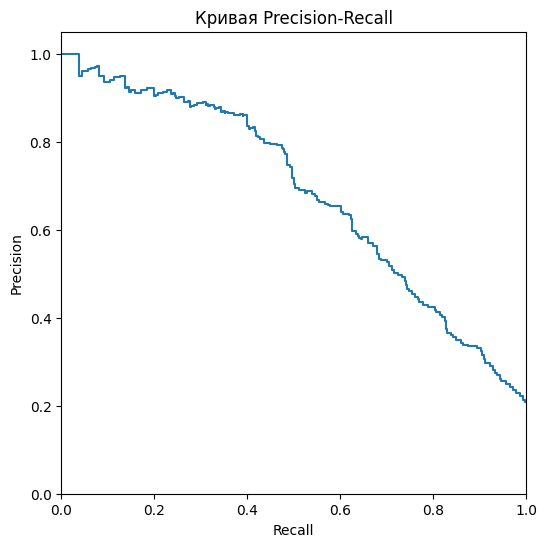

In [46]:
model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=180)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.95, 0.05):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)

    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1 = {:.3f}".format(
        threshold, precision, recall, f1))
    
precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show() 

Порог = 0.00 | Точность = 0.216, Полнота = 0.998, F1 = 0.356
Порог = 0.05 | Точность = 0.278, Полнота = 0.935, F1 = 0.428
Порог = 0.10 | Точность = 0.340, Полнота = 0.880, F1 = 0.491
Порог = 0.15 | Точность = 0.395, Полнота = 0.813, F1 = 0.532
Порог = 0.20 | Точность = 0.455, Полнота = 0.756, F1 = 0.568
Порог = 0.25 | Точность = 0.517, Полнота = 0.713, F1 = 0.600
Порог = 0.30 | Точность = 0.581, Полнота = 0.658, F1 = 0.617
Порог = 0.35 | Точность = 0.643, Полнота = 0.612, F1 = 0.627
Порог = 0.40 | Точность = 0.676, Полнота = 0.565, F1 = 0.615
Порог = 0.45 | Точность = 0.714, Полнота = 0.502, F1 = 0.590
Порог = 0.50 | Точность = 0.789, Полнота = 0.467, F1 = 0.586
Порог = 0.55 | Точность = 0.818, Полнота = 0.419, F1 = 0.554
Порог = 0.60 | Точность = 0.851, Полнота = 0.395, F1 = 0.539
Порог = 0.65 | Точность = 0.874, Полнота = 0.349, F1 = 0.499
Порог = 0.70 | Точность = 0.891, Полнота = 0.313, F1 = 0.464
Порог = 0.75 | Точность = 0.898, Полнота = 0.254, F1 = 0.396
Порог = 0.80 | Точность 

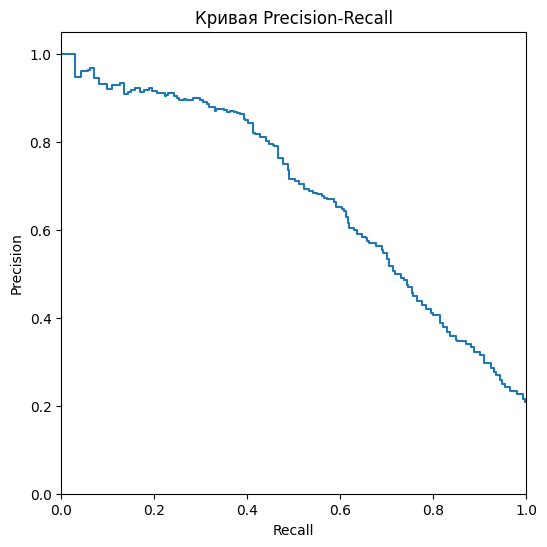

In [47]:
model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=140)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.95, 0.05):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)

    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1 = {:.3f}".format(
        threshold, precision, recall, f1))
    
precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show() 

Порог = 0.00 | Точность = 0.227, Полнота = 0.988, F1 = 0.369
Порог = 0.05 | Точность = 0.277, Полнота = 0.933, F1 = 0.427
Порог = 0.10 | Точность = 0.333, Полнота = 0.878, F1 = 0.483
Порог = 0.15 | Точность = 0.384, Полнота = 0.823, F1 = 0.524
Порог = 0.20 | Точность = 0.457, Полнота = 0.746, F1 = 0.567
Порог = 0.25 | Точность = 0.517, Полнота = 0.711, F1 = 0.598
Порог = 0.30 | Точность = 0.574, Полнота = 0.670, F1 = 0.618
Порог = 0.35 | Точность = 0.611, Полнота = 0.624, F1 = 0.618
Порог = 0.40 | Точность = 0.667, Полнота = 0.545, F1 = 0.600
Порог = 0.45 | Точность = 0.712, Полнота = 0.498, F1 = 0.586
Порог = 0.50 | Точность = 0.767, Полнота = 0.471, F1 = 0.584
Порог = 0.55 | Точность = 0.801, Полнота = 0.433, F1 = 0.562
Порог = 0.60 | Точность = 0.846, Полнота = 0.395, F1 = 0.538
Порог = 0.65 | Точность = 0.876, Полнота = 0.373, F1 = 0.523
Порог = 0.70 | Точность = 0.885, Полнота = 0.313, F1 = 0.463
Порог = 0.75 | Точность = 0.899, Полнота = 0.278, F1 = 0.424
Порог = 0.80 | Точность 

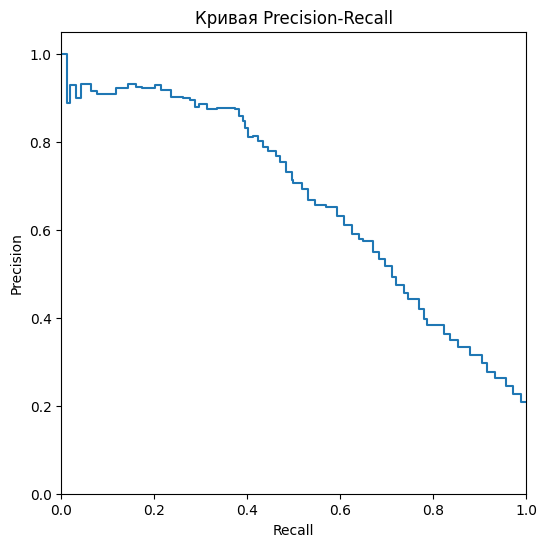

In [48]:
model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=65)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.95, 0.05):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)

    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1 = {:.3f}".format(
        threshold, precision, recall, f1))
    
precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show() 

Порог = 0.00 | Точность = 0.218, Полнота = 0.998, F1 = 0.358
Порог = 0.05 | Точность = 0.280, Полнота = 0.931, F1 = 0.431
Порог = 0.10 | Точность = 0.345, Полнота = 0.871, F1 = 0.495
Порог = 0.15 | Точность = 0.408, Полнота = 0.799, F1 = 0.540
Порог = 0.20 | Точность = 0.479, Полнота = 0.746, F1 = 0.583
Порог = 0.25 | Точность = 0.546, Полнота = 0.684, F1 = 0.607
Порог = 0.30 | Точность = 0.592, Полнота = 0.632, F1 = 0.611
Порог = 0.35 | Точность = 0.639, Полнота = 0.581, F1 = 0.609
Порог = 0.40 | Точность = 0.690, Полнота = 0.533, F1 = 0.602
Порог = 0.45 | Точность = 0.750, Полнота = 0.502, F1 = 0.602
Порог = 0.50 | Точность = 0.792, Полнота = 0.438, F1 = 0.564
Порог = 0.55 | Точность = 0.836, Полнота = 0.390, F1 = 0.532
Порог = 0.60 | Точность = 0.867, Полнота = 0.359, F1 = 0.508
Порог = 0.65 | Точность = 0.873, Полнота = 0.328, F1 = 0.477
Порог = 0.70 | Точность = 0.901, Полнота = 0.261, F1 = 0.404
Порог = 0.75 | Точность = 0.891, Полнота = 0.196, F1 = 0.322
Порог = 0.80 | Точность 

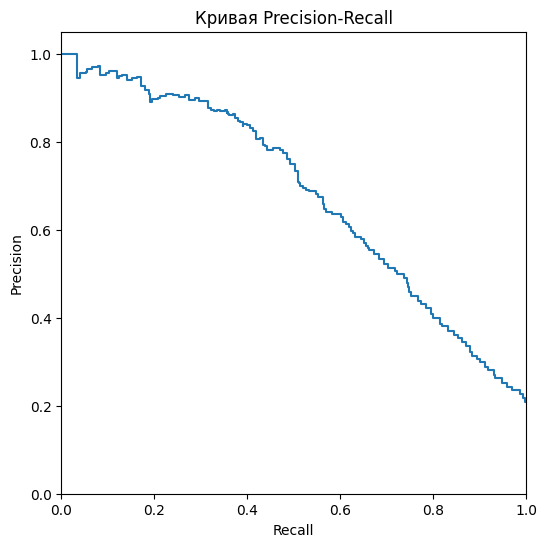

In [49]:
model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=140, class_weight='balanced')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.95, 0.05):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)

    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1 = {:.3f}".format(
        threshold, precision, recall, f1))
    
precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show() 

Порог = 0.00 | Точность = 0.224, Полнота = 0.993, F1 = 0.366
Порог = 0.05 | Точность = 0.270, Полнота = 0.945, F1 = 0.420
Порог = 0.10 | Точность = 0.335, Полнота = 0.880, F1 = 0.485
Порог = 0.15 | Точность = 0.396, Полнота = 0.811, F1 = 0.532
Порог = 0.20 | Точность = 0.466, Полнота = 0.766, F1 = 0.579
Порог = 0.25 | Точность = 0.509, Полнота = 0.718, F1 = 0.596
Порог = 0.30 | Точность = 0.564, Полнота = 0.667, F1 = 0.611
Порог = 0.35 | Точность = 0.620, Полнота = 0.608, F1 = 0.614
Порог = 0.40 | Точность = 0.668, Полнота = 0.553, F1 = 0.605
Порог = 0.45 | Точность = 0.711, Полнота = 0.512, F1 = 0.595
Порог = 0.50 | Точность = 0.776, Полнота = 0.471, F1 = 0.586
Порог = 0.55 | Точность = 0.802, Полнота = 0.426, F1 = 0.556
Порог = 0.60 | Точность = 0.834, Полнота = 0.397, F1 = 0.538
Порог = 0.65 | Точность = 0.879, Полнота = 0.366, F1 = 0.517
Порог = 0.70 | Точность = 0.875, Полнота = 0.318, F1 = 0.467
Порог = 0.75 | Точность = 0.908, Полнота = 0.261, F1 = 0.405
Порог = 0.80 | Точность 

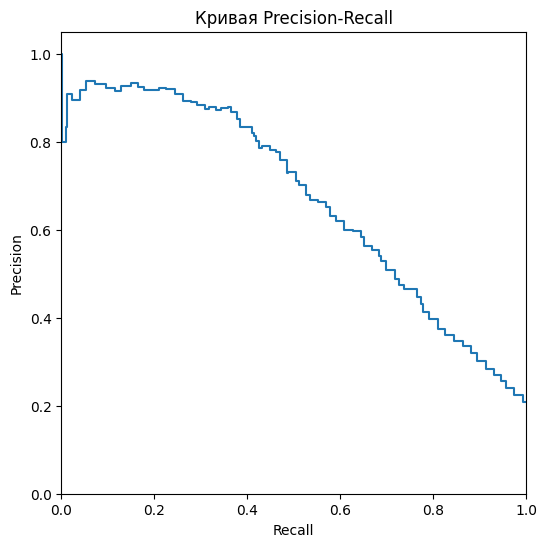

In [50]:
model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=75)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.95, 0.05):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)

    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1 = {:.3f}".format(
        threshold, precision, recall, f1))
    
precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show() 

Наилучшее значение метрики Ф1 модели случайного леса достигается при значении class_weight='None', кол-ве деревьев 180/140 и пороге 0.35 - **0.627**, что **является наилучшим значением** из всех способов (увеличение выборки, уменьшение выборки, изменение порога).

**решающее дерево**

Порог = 0.00 | Точность = 0.208, Полнота = 0.993, F1 = 0.344
Порог = 0.05 | Точность = 0.252, Полнота = 0.959, F1 = 0.399
Порог = 0.10 | Точность = 0.404, Полнота = 0.782, F1 = 0.533
Порог = 0.15 | Точность = 0.404, Полнота = 0.782, F1 = 0.533
Порог = 0.20 | Точность = 0.463, Полнота = 0.708, F1 = 0.560
Порог = 0.25 | Точность = 0.632, Полнота = 0.555, F1 = 0.591
Порог = 0.30 | Точность = 0.632, Полнота = 0.555, F1 = 0.591
Порог = 0.35 | Точность = 0.720, Полнота = 0.493, F1 = 0.585
Порог = 0.40 | Точность = 0.720, Полнота = 0.493, F1 = 0.585
Порог = 0.45 | Точность = 0.720, Полнота = 0.493, F1 = 0.585
Порог = 0.50 | Точность = 0.779, Полнота = 0.414, F1 = 0.541
Порог = 0.55 | Точность = 0.831, Полнота = 0.364, F1 = 0.506
Порог = 0.60 | Точность = 0.831, Полнота = 0.364, F1 = 0.506
Порог = 0.65 | Точность = 0.831, Полнота = 0.364, F1 = 0.506
Порог = 0.70 | Точность = 0.831, Полнота = 0.364, F1 = 0.506
Порог = 0.75 | Точность = 0.831, Полнота = 0.364, F1 = 0.506
Порог = 0.80 | Точность 

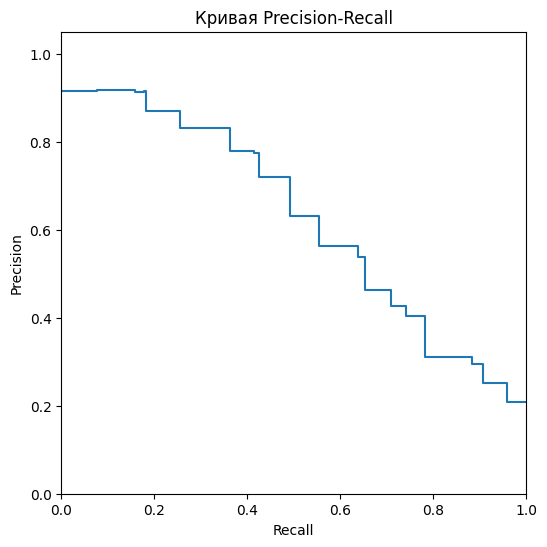

In [51]:
model = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=5)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.95, 0.05):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)

    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1 = {:.3f}".format(
        threshold, precision, recall, f1))
    
precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show() 

Порог = 0.00 | Точность = 0.252, Полнота = 0.811, F1 = 0.384
Порог = 0.05 | Точность = 0.290, Полнота = 0.768, F1 = 0.421
Порог = 0.10 | Точность = 0.416, Полнота = 0.632, F1 = 0.502
Порог = 0.15 | Точность = 0.452, Полнота = 0.615, F1 = 0.521
Порог = 0.20 | Точность = 0.474, Полнота = 0.572, F1 = 0.518
Порог = 0.25 | Точность = 0.504, Полнота = 0.548, F1 = 0.525
Порог = 0.30 | Точность = 0.534, Полнота = 0.522, F1 = 0.528
Порог = 0.35 | Точность = 0.550, Полнота = 0.517, F1 = 0.533
Порог = 0.40 | Точность = 0.557, Полнота = 0.505, F1 = 0.529
Порог = 0.45 | Точность = 0.565, Полнота = 0.488, F1 = 0.524
Порог = 0.50 | Точность = 0.572, Полнота = 0.457, F1 = 0.508
Порог = 0.55 | Точность = 0.582, Полнота = 0.452, F1 = 0.509
Порог = 0.60 | Точность = 0.605, Полнота = 0.433, F1 = 0.505
Порог = 0.65 | Точность = 0.605, Полнота = 0.433, F1 = 0.505
Порог = 0.70 | Точность = 0.624, Полнота = 0.428, F1 = 0.508
Порог = 0.75 | Точность = 0.624, Полнота = 0.373, F1 = 0.467
Порог = 0.80 | Точность 

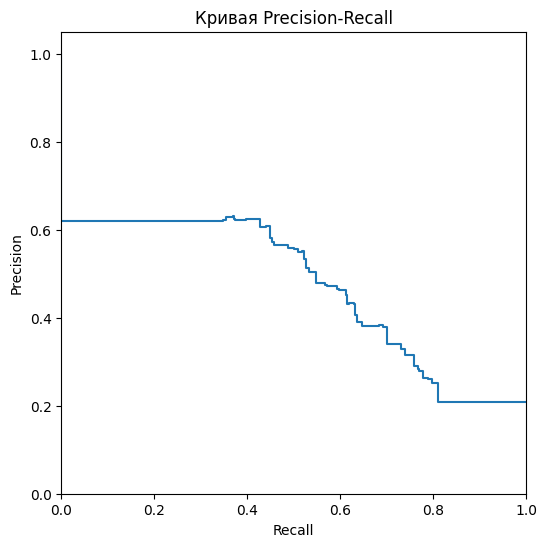

In [52]:
model = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=11)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.95, 0.05):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)

    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1 = {:.3f}".format(
        threshold, precision, recall, f1))
    
precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show() 

Модель решающего дерева при изменении порога показывает результаты хуже.

**Лучше всего себя показала модель случайного леса при использовании способа для борьбы с дизбалансом классов - изменение порога.**
**Наилучшее значение Ф1 - 0.627 при пороге в 0.35 и кол-ве деревьев 140/180**

Посмотрим также на кривую ROC и значение метрики AUC-ROC нашей лучшей модели на валидационной выборке.

Порог = 0.35 | Точность = 0.643, Полнота = 0.612, F1 = 0.627


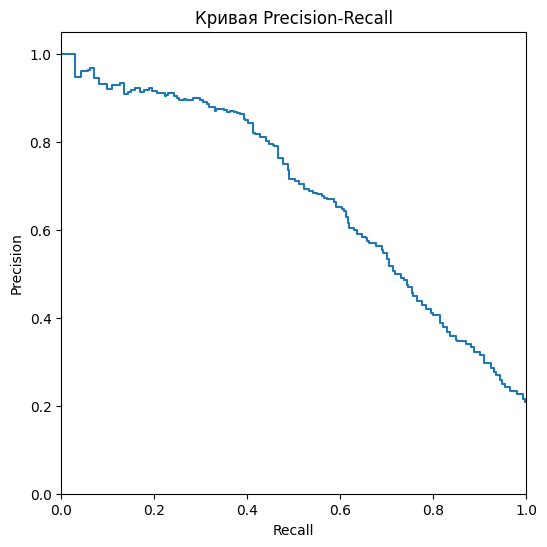

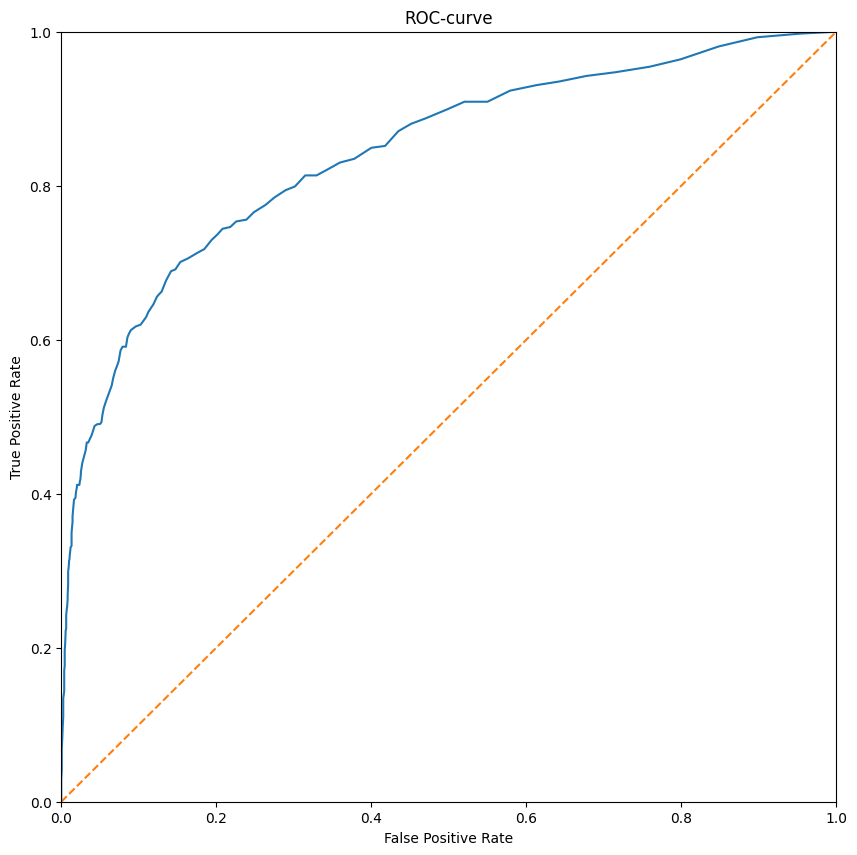

AUC: 0.8412841234219903


In [57]:
model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=140)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

threshold = 0.35

predicted_valid = probabilities_one_valid > threshold
precision = precision_score(target_valid, predicted_valid)
recall = recall_score(target_valid, predicted_valid)
f1 = f1_score(target_valid, predicted_valid)

print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1 = {:.3f}".format(
    threshold, precision, recall, f1))
    
precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show() 

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, linestyle='-')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve')
plt.show()

auc_roc = roc_auc_score (target_valid, probabilities_one_valid)

print("AUC:", auc_roc)

Наша модель лучше случайной, т.к. AUC > 0.5

## Тестирование модели

Проведём тестирование нашей лучшей модели на тестовой выборке.

Порог = 0.35 | F1 = 0.623


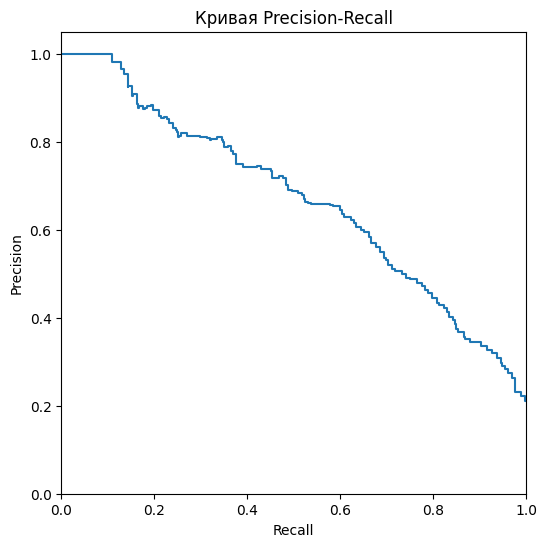

In [58]:
model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=140)
model.fit(features_train, target_train)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

threshold = 0.35

predicted_test = probabilities_one_test > threshold
f1 = f1_score(target_test, predicted_test)

print("Порог = {:.2f} | F1 = {:.3f}".format(
        threshold, f1))
    

precision, recall, thresholds = precision_recall_curve(target_test, probabilities_test[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show() 

In [ ]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 

plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, linestyle='-')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve')
plt.show()

auc_roc = roc_auc_score (target_valid, probabilities_one_valid)

print("AUC:", auc_roc)

Итак, найденная нами и обученная на валидационных данных модель случайного леса показала себя хорошо при тестировании.  
Метрика Ф1 оказалась выше нужного значения в 0.590, составив 0.623. Значение AUC также показало, что модель лучше случайной, ибо выше значения 0.5.

### Общий вывод

**Общий вывод исследования**  
Проведя исследование, мы выяснили, что:  
* в задании был сильный дизбаланс классов;
* игнорируя дизбаланс классов, мы узнали, что из трёх моделей, наилучшей оказалась модель случайного леса с наилучшим значением метрики Ф1 (0.5928), которая достигается при кол-ве деревьев - 180;
* при борьбе с дизбалансом, мы использовали три способа (увеличение выборки, уменьшение выборки, изменение порога);
* лучше всего себя показала модель случайного леса при использовании способа для борьбы с дизбалансом классов - изменение порога, наилучшее значение Ф1 - 0.627 при пороге в 35 и кол-ве деревьев 140/180;
* мы также посмотрели на кривую ROC и значение метрики AUC-ROC нашей лучшей модели на валидационной выборке, модель оказалась лучше случайной, т.к. AUC-ROC = 0.8413, что больше 0.5;
* провели финальное тестирование модели на тестовой выборке, модель показала себя хорошо, метрика Ф1 оказалась выше нужного порога в 0.590, составив 0.623, значение AUC также показало, что модель лучше случайной (0.5);
